In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv('train.csv')

# Data Summary

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train = train.drop('Id', axis=1)

In [5]:
train.columns[train.dtypes == int]

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
train.columns[train.dtypes != int]

Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

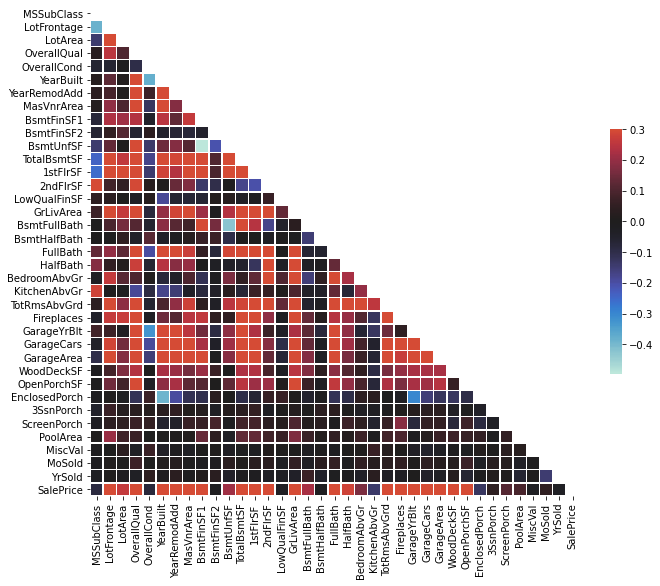

In [7]:
f, ax = plt.subplots(figsize=(11, 9))
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


# Checking Missing Values

In [9]:
na_counts = train.isnull().sum()

In [10]:
na_counts[na_counts != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Examining NA's for Alley
Replace Alley column NA's with no alley access

In [11]:
train['Alley'].fillna('No Alley Access', inplace=True)

# Examining NA's for MasVnrType

In [12]:
train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [13]:
train[train['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [14]:
train[train['MasVnrType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,No Alley Access,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,No Alley Access,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [15]:
train[train['MasVnrType'] == 'None'][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1454,None,0.0
1455,None,0.0
1457,None,0.0
1458,None,0.0


In [16]:
train[train['MasVnrType'].notnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [17]:
train = train[train['MasVnrType'].notna()]

In [18]:
train = train[train['MasVnrArea'].notna()]

# Examining NA's for Bsmt

In [19]:
bsmt_col = [col for col in train if col.startswith('Bsmt')]

Replace all NA's with 'No Basement' for all basement columns

In [20]:
train[bsmt_col] = train[bsmt_col].fillna('No Basement')

# Examining NA's for Electrical

In [21]:
train[train['Electrical'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [22]:
train[train['Electrical'].notnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [23]:
train = train[train['Electrical'].notna()]

# Examining NA's for FireplaceQu

In [24]:
train['FireplaceQu'].fillna('No Fireplace', inplace=True)

# Examining NA's for Garage Column

In [25]:
garage_col = [col for col in train if col.startswith('Garage')]

In [26]:
train[garage_col] = train[garage_col].fillna('No Garage')

# Examining NA's for PoolQC

In [27]:
train['PoolQC'].fillna('No Pool',inplace=True)

# Examining NA's for Fence

In [28]:
train['Fence'].fillna('No Fence', inplace=True)

# Examining NA's for MiscFeature

In [29]:
train['MiscFeature'].fillna('No Misc Feature', inplace=True)

# Encoding String Columns

In [30]:
cat_cols = train.select_dtypes(include=['object'])
cat_cols = cat_cols.columns

Save encoders for potential future use on test dataset

In [31]:
encoders = {}
for col in cat_cols:
    enc = LabelEncoder()
    train[f'{col}_cat'] = enc.fit_transform(train[col].astype(str))
    encoders[col] = enc

In [32]:
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
train_encoded = train.drop(cat_cols.to_list(), axis=1)

# Examining NA's for Lot Frontage

In [34]:
train_encoded[train_encoded['LotFrontage'].isnull()]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt_cat,GarageFinish_cat,GarageQual_cat,GarageCond_cat,PavedDrive_cat,PoolQC_cat,Fence_cat,MiscFeature_cat,SaleType_cat,SaleCondition_cat
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,59,2,5,5,2,3,4,3,8,4
12,20,NaN,12968,5,6,1962,1962,0.0,737,0,...,48,3,5,5,2,3,4,1,8,4
14,20,NaN,10920,6,5,1960,1960,212.0,733,0,...,46,2,5,5,2,3,1,1,8,4
16,20,NaN,11241,6,7,1970,1970,180.0,578,0,...,56,0,5,5,2,3,4,3,8,4
24,20,NaN,8246,5,8,1968,2001,0.0,188,668,...,54,3,5,5,2,3,2,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,20,NaN,12546,6,7,1981,1981,310.0,678,0,...,67,0,5,5,2,3,4,1,8,4
1431,120,NaN,4928,6,6,1976,1976,0.0,958,0,...,62,2,5,5,2,3,4,1,8,4
1441,120,NaN,4426,6,5,2004,2004,147.0,697,0,...,90,2,5,5,2,3,4,1,8,4
1443,30,NaN,8854,6,6,1916,1950,0.0,0,0,...,6,3,1,4,1,3,4,1,8,4


In [35]:
train_encoded[train_encoded['LotFrontage'].notnull()]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt_cat,GarageFinish_cat,GarageQual_cat,GarageCond_cat,PavedDrive_cat,PoolQC_cat,Fence_cat,MiscFeature_cat,SaleType_cat,SaleCondition_cat
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,89,2,5,5,2,3,4,1,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,62,2,5,5,2,3,4,1,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,87,2,5,5,2,3,4,1,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,84,3,5,5,2,3,4,1,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,86,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,85,2,5,5,2,3,4,1,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,64,3,5,5,2,3,2,1,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,29,2,5,5,2,3,0,3,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,36,3,5,5,2,3,4,1,8,4


In [36]:
test_na = train_encoded[train_encoded['LotFrontage'].isnull()]
train_na = train_encoded[train_encoded['LotFrontage'].notnull()]

In [37]:
test_na_X = test_na.drop(['SalePrice', 'LotFrontage'], axis=1)

In [38]:
train_na_X = train_na.drop(['SalePrice', 'LotFrontage'], axis=1)

In [39]:
train_na_y = train_na['LotFrontage']

In [40]:
rf = RandomForestRegressor()
rf.fit(train_na_X, train_na_y)

RandomForestRegressor()

In [41]:
lot_frontage_imputed = rf.predict(test_na_X)

In [42]:
m = train_encoded['LotFrontage'].isnull()
train_encoded.loc[m, 'LotFrontage'] = lot_frontage_imputed

In [43]:
train_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt_cat,GarageFinish_cat,GarageQual_cat,GarageCond_cat,PavedDrive_cat,PoolQC_cat,Fence_cat,MiscFeature_cat,SaleType_cat,SaleCondition_cat
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,89,2,5,5,2,3,4,1,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,62,2,5,5,2,3,4,1,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,87,2,5,5,2,3,4,1,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,84,3,5,5,2,3,4,1,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,86,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,85,2,5,5,2,3,4,1,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,64,3,5,5,2,3,2,1,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,29,2,5,5,2,3,0,3,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,36,3,5,5,2,3,4,1,8,4


Fill in missing values in non-encoded training set 

In [44]:
m = train['LotFrontage'].isnull()
train.loc[m, 'LotFrontage'] = lot_frontage_imputed

# Feature Selection

In [45]:
train_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt_cat,GarageFinish_cat,GarageQual_cat,GarageCond_cat,PavedDrive_cat,PoolQC_cat,Fence_cat,MiscFeature_cat,SaleType_cat,SaleCondition_cat
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,89,2,5,5,2,3,4,1,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,62,2,5,5,2,3,4,1,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,87,2,5,5,2,3,4,1,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,84,3,5,5,2,3,4,1,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,86,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,85,2,5,5,2,3,4,1,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,64,3,5,5,2,3,2,1,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,29,2,5,5,2,3,0,3,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,36,3,5,5,2,3,4,1,8,4


In [46]:
X = train_encoded.loc[:, train_encoded.columns != 'SalePrice']
y = train_encoded['SalePrice']


In [47]:
forest = RandomForestRegressor()
params = {'n_estimators': [100]}
grid = GridSearchCV(forest, param_grid=params, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100]})

In [48]:
grid.cv_results_

{'mean_fit_time': array([1.14534669]),
 'std_fit_time': array([0.05991623]),
 'mean_score_time': array([0.01072626]),
 'std_score_time': array([0.00155224]),
 'param_n_estimators': masked_array(data=[100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100}],
 'split0_test_score': array([0.87382789]),
 'split1_test_score': array([0.83754523]),
 'split2_test_score': array([0.87496633]),
 'split3_test_score': array([0.88916427]),
 'split4_test_score': array([0.80097439]),
 'mean_test_score': array([0.85529562]),
 'std_test_score': array([0.03207286]),
 'rank_test_score': array([1], dtype=int32)}

In [49]:
grid.best_estimator_.feature_importances_
train_encoded.columns.to_list()
feature_importances = zip(train_encoded.columns.to_list(), grid.best_estimator_.feature_importances_)

In [50]:
sorted_importance = sorted(list(feature_importances),key= lambda x: x[1],reverse=True)

In [56]:
[x[0] for x in sorted_importance]

[('OverallQual', 0.5841184540870339),
 ('GrLivArea', 0.11276468800177218),
 ('TotalBsmtSF', 0.039156724295573396),
 ('2ndFlrSF', 0.03744080493803776),
 ('BsmtFinSF1', 0.02879358593857573),
 ('1stFlrSF', 0.020835951195284162),
 ('GarageCars', 0.017463057175820175),
 ('GarageArea', 0.014565367115630907),
 ('LotArea', 0.012820948508595505),
 ('YearBuilt', 0.010853268585426583),
 ('TotRmsAbvGrd', 0.006986929250164417),
 ('LotFrontage', 0.006793297402638494),
 ('LandSlope_cat', 0.0066736401588145386),
 ('YearRemodAdd', 0.006119936855674554),
 ('MasVnrArea', 0.005308343291028689),
 ('OpenPorchSF', 0.005207023071082999),
 ('BsmtUnfSF', 0.005181829785026912),
 ('FireplaceQu_cat', 0.005147187176504237),
 ('Foundation_cat', 0.005146561917180075),
 ('WoodDeckSF', 0.0045993778015366825),
 ('MoSold', 0.004030054401067701),
 ('OverallCond', 0.003948791509939961),
 ('FullBath', 0.003807062584115932),
 ('GarageType_cat', 0.003054759729765663),
 ('HeatingQC_cat', 0.0029220163016647795),
 ('MasVnrType_c

TypeError: cannot perform reduce with flexible type

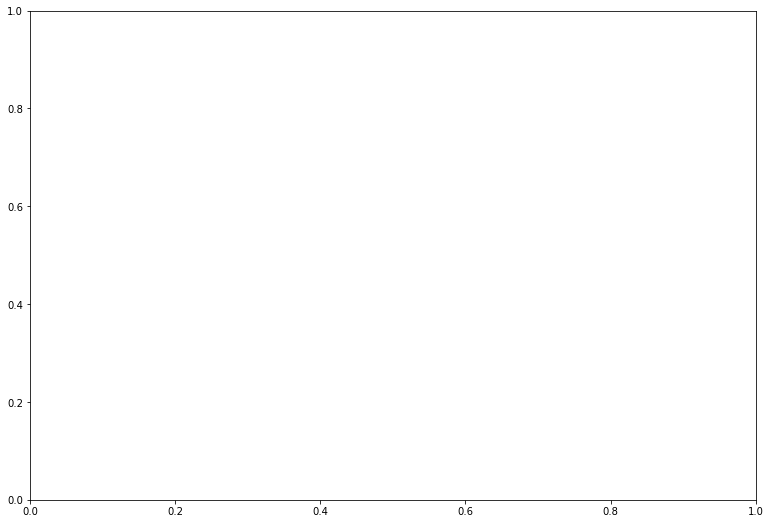

In [52]:
f, ax = plt.subplots(figsize=(13, 9))
sns.barplot(sorted_importance, )
plt.xticks(rotation=90)